## Table of Contents
* 1 - [Access data from a web browser](#section-1)
* 2 - [Access data using Tiled's Python client](#section-2)
    * 2.1 - [Setup kernel and required dependencies](#section-21)
    * 2.2 - [Read and download data](#section-22)
    * 2.3 - [Visualization and data analysis](#section-23)
    * 2.4 - [Log into an Authenticated Tiled Server](#section-24)

Note that the output of this notebook was generated using [Google Colab](https://colab.research.google.com/).



## <a id='section-1'>1 - Access data from a web browser</a>

Click the first tab on https://aimm.lbl.gov/

## <a id='section-2'>2 - Access data using Tiled's Python client</a>
### <a id='section-21'>2.1 - Setup kernel and required dependencies</a>
**Tiled** is a data access service for data-aware portals and data science tools. Tiled has a Python client and integrates naturally with Python data science libraries, but nothing about the service is Python-specific; it also works from a web browser or any Internet-connected program.

You can find a detailed **Tiled** document here: https://blueskyproject.io/tiled/tutorials/installation.html

In [ ]:
# Install Tiled from PyPI using pip
!pip install "tiled[client]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 742.2/742.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 929.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.4/706.4 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00


### <a id='section-22'>2.2 - Read and download data</a>

In [ ]:
# connect with client
from tiled.client import from_uri

client = from_uri("https://aimm.lbl.gov")

In [ ]:
client

<Container {'newville', 'nmc_sim_structure', 'nmc_sim', ...} ~4 entries>

`client` holds a nested structure of data. Conceptually, it corresponds well to a directory of files or hierarchical structure like an HDF5 file or XML file.

Tiled provides a utility for visualizing a nested structure. Each (sub)tree displays the names of a couple of its entries—up to however many fit on one line.


In [ ]:
from tiled.utils import tree
tree(client)

├── newville
│   ├── 25AKcQNYmJG
│   ├── 2C8GsD3CCB3
│   ├── 2DKJLMZPi8s
│   ├── 2jRSGYmbd56
│   ├── 386Vs5S24DC
│   ├── 3ChbS59SHVR
│   ├── 3e7RZRJAWJB
│   ├── 3h2NCNmJY57
│   ├── 3jyVzUb6SMg
│   ├── 3pGgpiqJpd4
│   ├── 47E9w6mjVoH
│   ├── 4BAGPyvPJjn
│   ├── 4p7baCNseu2
│   ├── 4TtCKV3J7Wn
│   ├── 4VaxabvkAAB
│   ├── 5sG6ha6cnqg
│   ├── 5syrCXRVqXk
│   ├── 5wB34QCoW5q
│   ├── 68ThTdcGneG
<Output truncated at 20 lines. Adjust tree's max_lines parameter to see more.>


`Containers` act like (nested) mappings in Python. All the (read-only) methods that work on Python dictionaries work on Containers. We can lookup a specific value by its key.

In [ ]:
client

<Container {'newville', 'nmc_sim_structure', 'nmc_sim', ...} ~4 entries>

list all the keys.

In [ ]:
list(client)

['newville', 'nmc_sim_structure', 'nmc_sim', 'nmc_sim_vasp']

In [ ]:
client['newville']

<Container {'25AKcQNYmJG', '2C8GsD3CCB3', '2DKJLMZPi8s', ...} ~270 entries>

In [ ]:
client['newville']['2DKJLMZPi8s']

<DataFrameClient ['energy', 'i0', 'itrans', 'irefer']>

To read data

In [ ]:
client['newville']['2DKJLMZPi8s'].read()

,energy,i0,itrans,irefer
0,11634.890,522870.31,93227.473667,38013.990388
1,11644.908,520022.31,93078.545736,38184.020421
2,11654.944,517087.31,92891.462192,38341.986093
3,11664.998,514413.31,92754.484191,38505.995152
4,11675.070,511248.31,92509.505530,38641.000495
...,...,...,...,...
408,12860.495,1304307.90,212641.539366,115721.545351
409,12866.269,1305841.80,213373.930600,116433.334046
410,12872.408,1309225.10,214432.009149,117344.741918
411,12878.555,1311274.00,215239.521752,118120.626724


To read slices of data

In [ ]:
client['newville']['2DKJLMZPi8s'].read(['energy', 'i0'])

,energy,i0
0,11634.890,522870.31
1,11644.908,520022.31
2,11654.944,517087.31
3,11664.998,514413.31
4,11675.070,511248.31
...,...,...
408,12860.495,1304307.90
409,12866.269,1305841.80
410,12872.408,1309225.10
411,12878.555,1311274.00


The Tiled server can encode its structures in various formats for exporting data. These are just a couple of the supported formats:

In [ ]:
# Table
client['newville']['2DKJLMZPi8s'].export("table.xlsx")  # Excel
client['newville']['2DKJLMZPi8s'].export("table.csv")  # CSV

# Array
client['newville']['2DKJLMZPi8s'].export("numbers.csv")  # CSV
# client['newville']['2DKJLMZPi8s'].export("image.png")  # PNG image
# client['newville']['2DKJLMZPi8s'].export("image.tiff")  # TIFF image

If running this notebook on Google Colab, click the folder sign on the left panel and you will see the exported files, right click to download to your local machine.

In [ ]:
# Export just some of the columns...
# client['newville']['2DKJLMZPi8s'].export("table.csv", columns=["energy", "i0"])

### <a id='section-23'>2.3 - Visualization and data analysis</a>

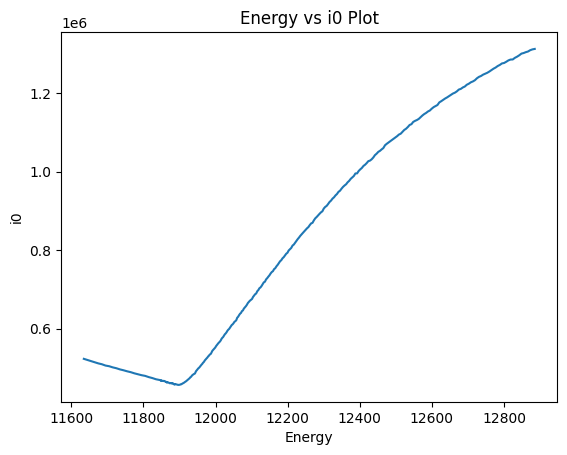

In [ ]:
import matplotlib.pyplot as plt

energy_data = client['newville']['2DKJLMZPi8s'].read(['energy'])
i0_data = client['newville']['2DKJLMZPi8s'].read(['i0'])

plt.plot(energy_data, i0_data)
plt.xlabel('Energy')
plt.ylabel('i0')
plt.title('Energy vs i0 Plot')
plt.show()

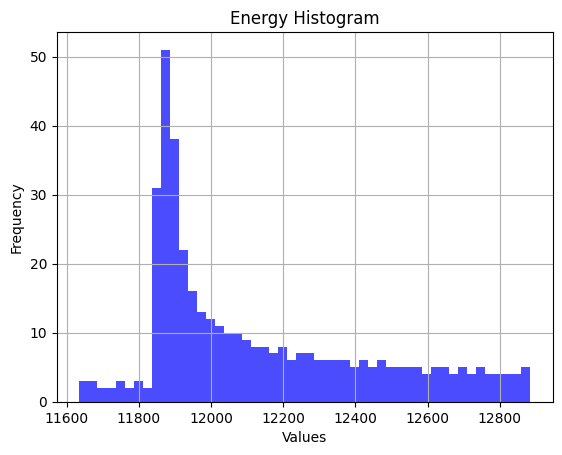

In [ ]:
plt.hist(energy_data, bins=50, color='blue', alpha=0.7)
plt.title('Energy Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<a id='section-24'></a>
## 2.4 Log into an Authenticated Tiled Server
So that you can access private dataset

In [ ]:
client.login()


You have 15 minutes visit this URL

  https://orcid.org/oauth/authorize?client_id=APP-0ROS9DU5F717F7XN&response_type=code&scope=openid&redirect_uri=https%3A%2F%2Faimm.lbl.gov%2Fapi%2Fv1%2Fauth%2Fprovider%2Forcid%2Fdevice_code

and enter the code:

  6F62-8B7D


Waiting.......
You have logged in with ORCID as 0000-0001-8312-1470


In [ ]:
client

<Container {'aimm_core', 'heald', 'iss', 'iss-raw', 'newville', ...} ~10 entries>

In [ ]:
list(client)

['aimm_core',
 'heald',
 'iss',
 'iss-raw',
 'newville',
 'nmc',
 'nmc_electrochem',
 'nmc_sim_structure',
 'nmc_sim',
 'nmc_sim_vasp']

In [ ]:
wanli_dataset = client['aimm_core']

In [ ]:
wanli_dataset['4yk5nB7RvRN'].read()

,energy,mu
0,839.988000,0.078059
1,840.013022,0.071357
2,840.038044,0.064934
3,840.063065,0.058785
4,840.088087,0.052903
...,...,...
1995,889.906440,3.211171
1996,889.931462,3.231664
1997,889.956484,3.252252
1998,889.981506,3.272934


Now log out via:

In [ ]:
client.logout()